(inventory_sales_smoothing-v6)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Production Smoothing via Inventories

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture employs the following library:

In [1]:
!pip install quantecon

## Overview

This lecture can be viewed as an application of this {doc}`quantecon lecture <lqcontrol>` about linear quadratic control
theory.

It formulates a discounted dynamic program for a firm that
chooses a production schedule to balance

- minimizing costs of production across time, against
- keeping costs of holding inventories low

In the tradition of a classic book by Holt, Modigliani, Muth, and
Simon {cite}`Holt_Modigliani_Muth_Simon`, we simplify the
firm’s problem by formulating it as a linear quadratic discounted
dynamic programming problem of the type studied in this {doc}`quantecon lecture <lqcontrol>`.

Because its costs of production are increasing and quadratic in
production, the firm holds inventories as a buffer stock in order to smooth production across time, provided
that holding inventories is not too costly.

But the firm also wants to make its sales  out of existing inventories, a
preference that we represent by a cost that is quadratic in the
difference between sales in a period and the firm’s beginning of period
inventories.

We compute examples designed to indicate how the firm optimally
smooths production  while keeping inventories
close to sales.

To introduce components of the model, let

- $S_t$ be sales at time $t$
- $Q_t$ be production at time $t$
- $I_t$ be inventories at the beginning of time $t$
- $\beta \in (0,1)$ be a discount factor
- $c(Q_t) = c_1 Q_t + c_2 Q_t^2$, be a cost of production
  function, where $c_1>0, c_2>0$, be an inventory cost function
- $d(I_t, S_t) = d_1 I_t + d_2 (S_t - I_t)^2$, where
  $d_1>0, d_2 >0$, be a cost-of-holding-inventories function,
  consisting of two components:
    - a cost $d_1 I_t$ of carrying inventories, and
    - a cost $d_2 (S_t - I_t)^2$ of having inventories deviate
      from sales
- $p_t = a_0 - a_1 S_t + v_t$ be an inverse demand function for a
  firm’s product, where $a_0>0, a_1 >0$ and $v_t$ is a
  demand shock at time $t$
- $\pi\_t = p_t S_t - c(Q_t) - d(I_t, S_t)$ be the firm’s
  profits at time $t$
- $\sum_{t=0}^\infty \beta^t \pi_t$
  be the present value of the firm’s profits at
  time $0$
- $I_{t+1} = I_t + Q_t - S_t$ be the law of motion of inventories
- $z_{t+1} = A_{22} z_t + C_2 \epsilon_{t+1}$ be a law
  of motion for an exogenous state vector $z_t$ that contains
  time $t$ information useful for predicting the demand shock
  $v_t$
- $v_t = G z_t$ link the demand shock to the information set
  $z_t$
- the constant $1$ be the first component of $z_t$

To map our problem into a linear-quadratic discounted dynamic
programming problem (also known as an optimal linear regulator), we
define the **state** vector at time $t$ as

$$
x_t = \begin{bmatrix} I_t \cr z_t \end{bmatrix}
$$

and the **control** vector as

$$
u_t =  \begin{bmatrix} Q_t \cr S_t \end{bmatrix}
$$

The law of motion for the state vector $x_t$ is evidently

$$
\begin{aligned}
 \begin{bmatrix} I_{t+1} \cr z_t \end{bmatrix} = \left[\begin{array}{cc}
1 & 0\\
0 & A_{22}
\end{array}\right] \begin{bmatrix} I_t \cr z_t \end{bmatrix}
             + \begin{bmatrix} 1 & -1 \cr
             0 & 0 \end{bmatrix} \begin{bmatrix} Q_t \cr S_t \end{bmatrix}
             + \begin{bmatrix} 0 \cr C_2 \end{bmatrix} \epsilon_{t+1} \end{aligned}
$$

or

$$
x_{t+1} = A x_t + B u_t + C \epsilon_{t+1}
$$

(At this point, we ask that you please forgive us for using $Q_t$
to be the firm’s production at time $t$, while below we use
$Q$ as the matrix in the quadratic form $u_t' Q u_t$ that
appears in the firm’s one-period profit function)

We can express the firm’s profit as a function of states and controls as

$$
\pi_t =  - (x_t' R x_t + u_t' Q u_t + 2 u_t' N x_t )
$$

To form the matrices $R, Q, N$ in an LQ dynamic programming problem, we note that the firm’s profits at
time $t$ function can be expressed

$$
\begin{aligned}
\pi_{t} =&p_{t}S_{t}-c\left(Q_{t}\right)-d\left(I_{t},S_{t}\right)  \\
    =&\left(a_{0}-a_{1}S_{t}+v_{t}\right)S_{t}-c_{1}Q_{t}-c_{2}Q_{t}^{2}-d_{1}I_{t}-d_{2}\left(S_{t}-I_{t}\right)^{2}  \\
    =&a_{0}S_{t}-a_{1}S_{t}^{2}+Gz_{t}S_{t}-c_{1}Q_{t}-c_{2}Q_{t}^{2}-d_{1}I_{t}-d_{2}S_{t}^{2}-d_{2}I_{t}^{2}+2d_{2}S_{t}I_{t}  \\
    =&-\left(\underset{x_{t}^{\prime}Rx_{t}}{\underbrace{d_{1}I_{t}+d_{2}I_{t}^{2}}}\underset{u_{t}^{\prime}Qu_{t}}{\underbrace{+a_{1}S_{t}^{2}+d_{2}S_{t}^{2}+c_{2}Q_{t}^{2}}}
    \underset{2u_{t}^{\prime}N x_{t}}{\underbrace{-a_{0}S_{t}-Gz_{t}S_{t}+c_{1}Q_{t}-2d_{2}S_{t}I_{t}}}\right) \\
    =&-\left(\left[\begin{array}{cc}
I_{t} & z_{t}^{\prime}\end{array}\right]\underset{\equiv R}{\underbrace{\left[\begin{array}{cc}
d_{2} & \frac{d_{1}}{2}S_{c}\\
\frac{d_{1}}{2}S_{c}^{\prime} & 0
\end{array}\right]}}\left[\begin{array}{c}
I_{t}\\
z_{t}
\end{array}\right]+\left[\begin{array}{cc}
Q_{t} & S_{t}\end{array}\right]\underset{\equiv Q}{\underbrace{\left[\begin{array}{cc}
c_{2} & 0\\
0 & a_{1}+d_{2}
\end{array}\right]}}\left[\begin{array}{c}
Q_{t}\\
S_{t}
\end{array}\right]+2\left[\begin{array}{cc}
Q_{t} & S_{t}\end{array}\right]\underset{\equiv N}{\underbrace{\left[\begin{array}{cc}
0 & \frac{c_{1}}{2}S_{c}\\
-d_{2} & -\frac{a_{0}}{2}S_{c}-\frac{G}{2}
\end{array}\right]}}\left[\begin{array}{c}
I_{t}\\
z_{t}
\end{array}\right]\right)
\end{aligned}
$$

where $S_{c}=\left[1,0\right]$.

**Remark on notation:** The notation for cross product term in the
QuantEcon library is $N$.

The firms’ optimum decision rule takes the form

$$
u_t = - F x_t
$$

and the evolution of the state under the optimal decision rule is

$$
x_{t+1} = (A - BF ) x_t + C \epsilon_{t+1}
$$

The firm chooses a decision rule for $u_t$ that maximizes

$$
E_0 \sum_{t=0}^\infty \beta^t \pi_t
$$

subject to a given $x_0$.

This is a stochastic discounted LQ dynamic program.

Here is code for computing an optimal decision rule and for analyzing
its consequences.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import quantecon as qe

In [3]:
class SmoothingExample:
    """
    Class for constructing, solving, and plotting results for
    inventories and sales smoothing problem.
    """

    def __init__(self,
                 β=0.96,           # Discount factor
                 c1=1,             # Cost-of-production
                 c2=1,
                 d1=1,             # Cost-of-holding inventories
                 d2=1,
                 a0=10,            # Inverse demand function
                 a1=1,
                 A22=[[1,   0],    # z process
                      [1, 0.9]],
                 C2=[[0], [1]],
                 G=[0, 1]):

        self.β = β
        self.c1, self.c2 = c1, c2
        self.d1, self.d2 = d1, d2
        self.a0, self.a1 = a0, a1
        self.A22 = np.atleast_2d(A22)
        self.C2 = np.atleast_2d(C2)
        self.G = np.atleast_2d(G)

        # Dimensions
        k, j = self.C2.shape        # Dimensions for randomness part
        n = k + 1                   # Number of states
        m = 2                       # Number of controls

        Sc = np.zeros(k)
        Sc[0] = 1

        # Construct matrices of transition law
        A = np.zeros((n, n))
        A[0, 0] = 1
        A[1:, 1:] = self.A22

        B = np.zeros((n, m))
        B[0, :] = 1, -1

        C = np.zeros((n, j))
        C[1:, :] = self.C2

        self.A, self.B, self.C = A, B, C

        # Construct matrices of one period profit function
        R = np.zeros((n, n))
        R[0, 0] = d2
        R[1:, 0] = d1 / 2 * Sc
        R[0, 1:] = d1 / 2 * Sc

        Q = np.zeros((m, m))
        Q[0, 0] = c2
        Q[1, 1] = a1 + d2

        N = np.zeros((m, n))
        N[1, 0] = - d2
        N[0, 1:] = c1 / 2 * Sc
        N[1, 1:] = - a0 / 2 * Sc - self.G / 2

        self.R, self.Q, self.N = R, Q, N

        # Construct LQ instance
        self.LQ = qe.LQ(Q, R, A, B, C, N, beta=β)
        self.LQ.stationary_values()

    def simulate(self, x0, T=100):

        c1, c2 = self.c1, self.c2
        d1, d2 = self.d1, self.d2
        a0, a1 = self.a0, self.a1
        G = self.G

        x_path, u_path, w_path = self.LQ.compute_sequence(x0, ts_length=T)

        I_path = x_path[0, :-1]
        z_path = x_path[1:, :-1]
        𝜈_path = (G @ z_path)[0, :]

        Q_path = u_path[0, :]
        S_path = u_path[1, :]

        revenue = (a0 - a1 * S_path + 𝜈_path) * S_path
        cost_production = c1 * Q_path + c2 * Q_path ** 2
        cost_inventories = d1 * I_path + d2 * (S_path - I_path) ** 2

        Q_no_inventory = (a0 + 𝜈_path - c1) / (2 * (a1 + c2))
        Q_hardwired = (a0 + 𝜈_path - c1) / (2 * (a1 + c2 + d2))

        fig, ax = plt.subplots(2, 2, figsize=(15, 10))

        ax[0, 0].plot(range(T), I_path, label="inventories")
        ax[0, 0].plot(range(T), S_path, label="sales")
        ax[0, 0].plot(range(T), Q_path, label="production")
        ax[0, 0].legend(loc=1)
        ax[0, 0].set_title("inventories, sales, and production")

        ax[0, 1].plot(range(T), (Q_path - S_path), color='b')
        ax[0, 1].set_ylabel("change in inventories", color='b')
        span = max(abs(Q_path - S_path))
        ax[0, 1].set_ylim(0-span*1.1, 0+span*1.1)
        ax[0, 1].set_title("demand shock and change in inventories")

        ax1_ = ax[0, 1].twinx()
        ax1_.plot(range(T), 𝜈_path, color='r')
        ax1_.set_ylabel("demand shock", color='r')
        span = max(abs(𝜈_path))
        ax1_.set_ylim(0-span*1.1, 0+span*1.1)

        ax1_.plot([0, T], [0, 0], '--', color='k')

        ax[1, 0].plot(range(T), revenue, label="revenue")
        ax[1, 0].plot(range(T), cost_production, label="cost_production")
        ax[1, 0].plot(range(T), cost_inventories, label="cost_inventories")
        ax[1, 0].legend(loc=1)
        ax[1, 0].set_title("profits decomposition")

        ax[1, 1].plot(range(T), Q_path, label="production")
        ax[1, 1].plot(range(T), Q_hardwired, label='production when  $I_t$ \
            forced to be zero')
        ax[1, 1].plot(range(T), Q_no_inventory, label='production when \
            inventories not useful')
        ax[1, 1].legend(loc=1)
        ax[1, 1].set_title('three production concepts')

        plt.show()

Notice that the above code sets parameters at the following default
values

- discount factor $\beta=0.96$,
- inverse demand function: $a0=10, a1=1$
- cost of production $c1=1, c2=1$
- costs of holding inventories $d1=1, d2=1$

In the examples below, we alter some or all of these parameter values.

## Example 1

In this example, the demand shock follows AR(1) process:

$$
\nu_t = \alpha + \rho \nu_{t-1} + \epsilon_t,
$$

which implies

$$
z_{t+1}=\left[\begin{array}{c}
1\\
v_{t+1}
\end{array}\right]=\left[\begin{array}{cc}
1 & 0\\
\alpha & \rho
\end{array}\right]\underset{z_{t}}{\underbrace{\left[\begin{array}{c}
1\\
v_{t}
\end{array}\right]}}+\left[\begin{array}{c}
0\\
1
\end{array}\right]\epsilon_{t+1}.
$$

We set $\alpha=1$ and $\rho=0.9$, their default values.

We’ll calculate and display outcomes, then discuss them below the
pertinent figures.

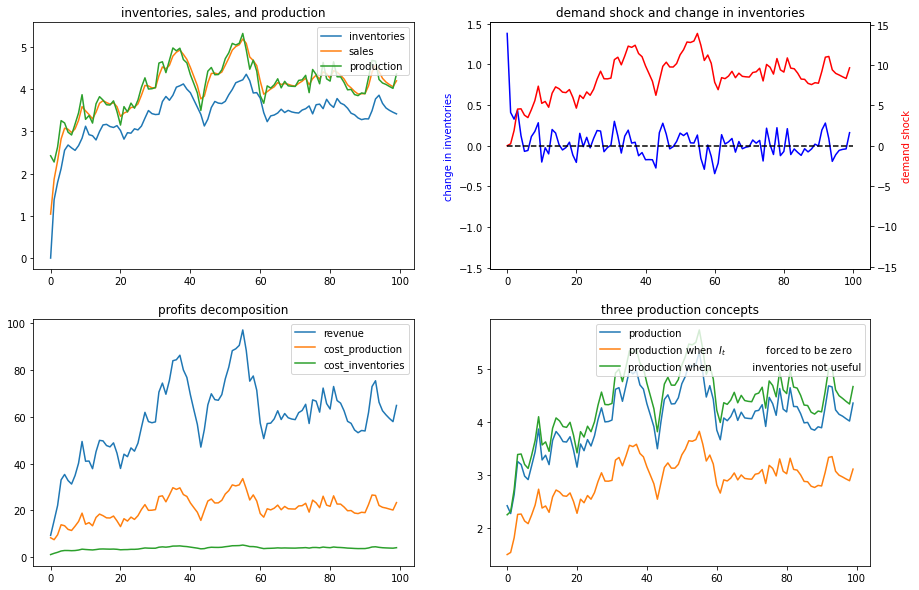

In [4]:
ex1 = SmoothingExample()

x0 = [0, 1, 0]
ex1.simulate(x0)

The figures above illustrate various features of an optimal production
plan.

Starting from zero inventories, the firm builds up a stock of
inventories and uses them to smooth costly production in the face of
demand shocks.

Optimal decisions evidently respond to demand shocks.

Inventories are always less than sales, so some sales come from current
production, a consequence of the cost, $d_1 I_t$ of holding
inventories.

The lower right panel shows differences between optimal production and
two alternative production concepts that come from altering the firm’s
cost structure – i.e., its technology.

These two concepts correspond to these distinct altered firm problems.

- a setting in which inventories are not needed
- a setting in which they are needed but we arbitrarily prevent the
  firm from holding inventories by forcing it to set $I_t=0$
  always

We use these two alternative production concepts in order to shed light on the baseline model.

## Inventories Not Useful

Let’s turn first to the setting in which inventories aren’t needed.

In this problem, the firm forms an output plan that maximizes the expected
value of

$$
\sum_{t=0}^\infty \beta^t \{ p_t Q_t - C(Q_t) \}
$$

It turns out that the optimal plan for $Q_t$ for this problem also
solves a sequence of static problems
$\max_{Q_t}\{p_t Q_t - c(Q_t)\}$.

When inventories aren’t required or used,  sales always equal
production.

This simplifies the problem and the optimal no-inventory production
maximizes the expected value of

$$
\sum_{t=0}^{\infty}\beta^{t}\left\{ p_{t}Q_{t}-C\left(Q_{t}\right)\right\}.
$$

The optimum decision rule is

$$
Q_{t}^{ni}=\frac{a_{0}+\nu_{t}-c_{1}}{c_{2}+a_{1}}.
$$

## Inventories Useful but are Hardwired to be Zero Always

Next, we turn to a distinct problem in which inventories are useful –
meaning that there are costs of $d_2 (I_t - S_t)^2$ associated
with having sales not equal to inventories – but we arbitrarily impose on the firm
the costly restriction that it never hold inventories.

Here the firm’s maximization problem is

$$
\max_{\{I_t, Q_t, S_t\}}\sum_{t=0}^{\infty}\beta^{t}\left\{ p_{t}S_{t}-C\left(Q_{t}\right)-d\left(I_{t},S_{t}\right)\right\}
$$

subject to the restrictions that $I_{t}=0$ for all $t$ and
that $I_{t+1}=I_{t}+Q_{t}-S_{t}$.

The restriction that $I_t = 0$ implies that $Q_{t}=S_{t}$
and that the maximization problem reduces to

$$
\max_{Q_t}\sum_{t=0}^{\infty}\beta^{t}\left\{ p_{t}Q_{t}-C\left(Q_{t}\right)-d\left(0,Q_{t}\right)\right\}
$$

Here the optimal production plan is

$$
Q_{t}^{h}=\frac{a_{0}+\nu_{t}-c_{1}}{c_{2}+a_{1}+d_{2}}.
$$

We introduce this $I_t$ **is hardwired to zero** specification in
order to shed light on the role that inventories play by comparing outcomes
with those under our two other versions of the problem.

The bottom right panel displays a production path for the original
problem that we are interested in (the blue line) as well with an
optimal production path for the model in which inventories are not
useful (the green path) and also for the model in which, although
inventories are useful, they are hardwired to zero and the firm pays
cost $d(0, Q_t)$ for not setting sales $S_t = Q_t$ equal to
zero (the orange line).

Notice that it is typically optimal for the firm to produce more when
inventories aren’t useful. Here there is no requirement to sell out of
inventories and no costs from having sales deviate from inventories.

But “typical” does not mean “always”.

Thus, if we look closely, we notice that for small $t$, the green
“production when inventories aren’t useful” line in the lower right
panel is below optimal production in the original model.

High optimal production in the original model early on occurs because the
firm wants to accumulate inventories quickly in order to acquire high
inventories for use in later periods.

But how the green line compares to the blue line early on depends on the
evolution of the demand shock, as we will see in a
deterministically seasonal demand shock example to be analyzed below.

In that example,  the original firm optimally accumulates inventories slowly
because the next positive demand shock is in the distant future.

To make the green-blue model production comparison easier to see, let’s
confine the graphs to the first 10 periods:

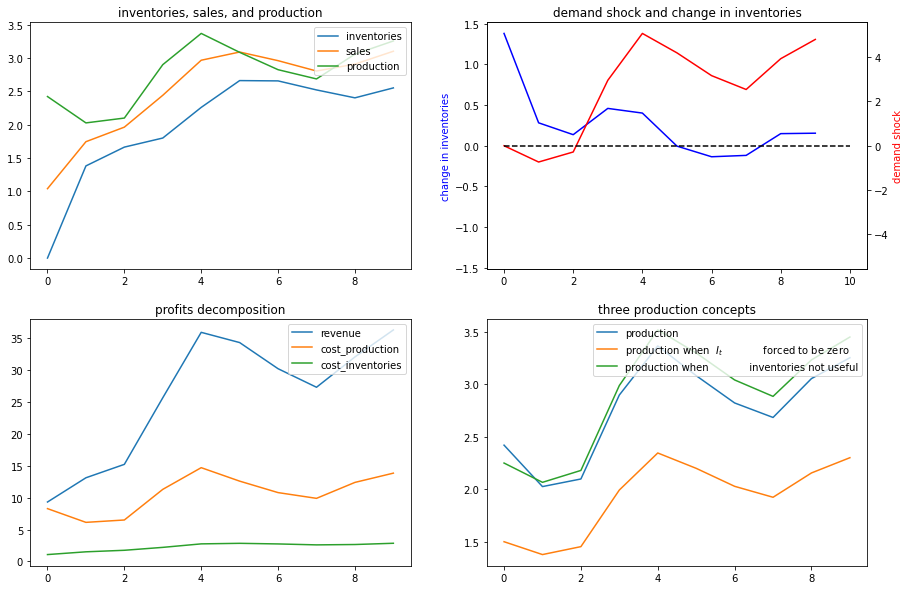

In [5]:
ex1.simulate(x0, T=10)

## Example 2

Next, we shut down randomness in demand and assume that the demand shock
$\nu_t$ follows a deterministic path:

$$
\nu_t = \alpha + \rho \nu_{t-1}
$$

Again, we’ll compute and display outcomes in some figures

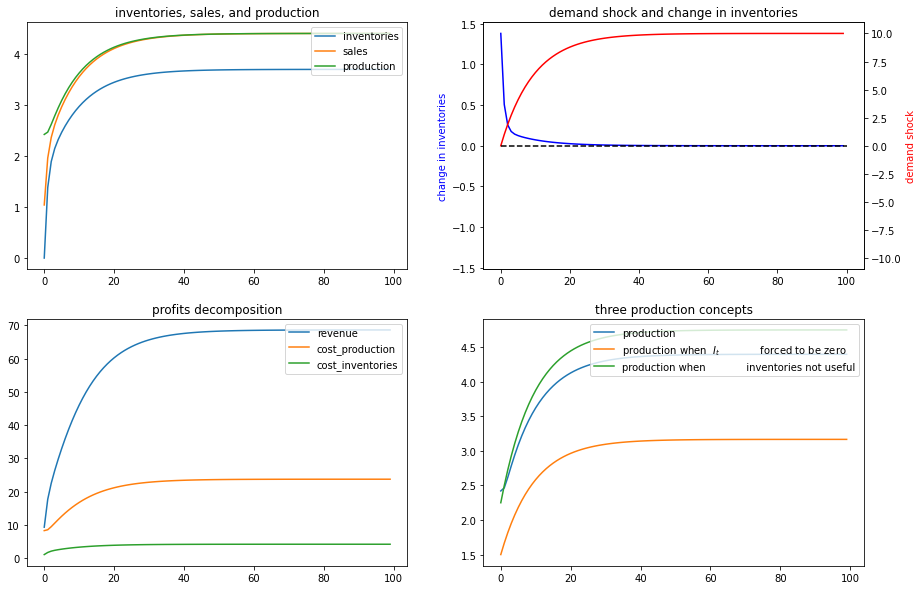

In [6]:
ex2 = SmoothingExample(C2=[[0], [0]])

x0 = [0, 1, 0]
ex2.simulate(x0)

## Example 3

Now we’ll put randomness back into the demand shock process and also
assume that there are zero costs of holding inventories.

In particular, we’ll look at a situation in which $d_1=0$ but
$d_2>0$.

Now it becomes optimal to set sales approximately equal to
inventories and to use inventories to smooth production quite well, as
the following figures confirm

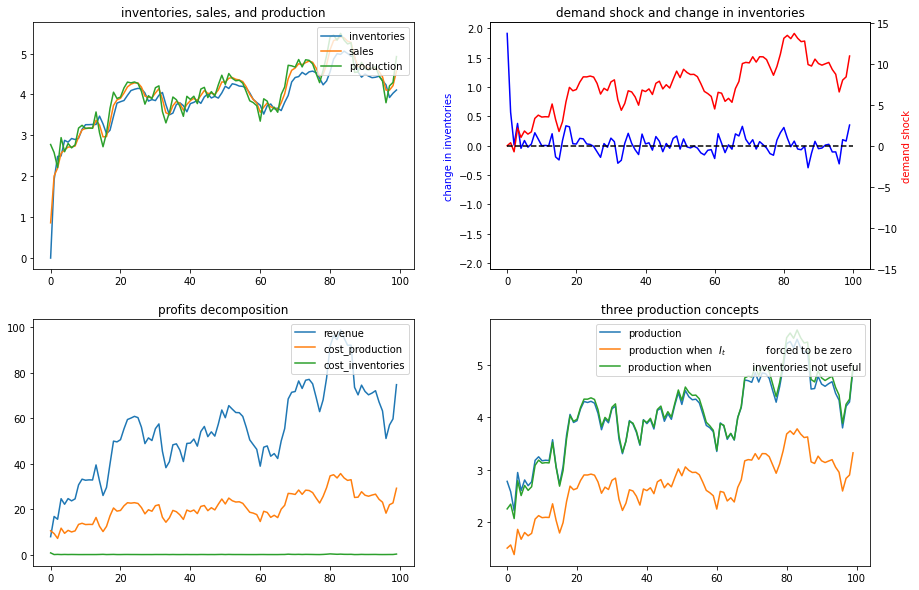

In [7]:
ex3 = SmoothingExample(d1=0)

x0 = [0, 1, 0]
ex3.simulate(x0)

## Example 4

To bring out some features of the optimal policy that are related to
some technical issues in linear control theory, we’ll now temporarily
assume that it is costless to hold inventories.

When we completely shut down the cost of holding inventories by setting
$d_1=0$ and $d_2=0$, something absurd happens (because the
Bellman equation is opportunistic and very smart).

(Technically, we have set parameters that end up violating conditions
needed to assure **stability** of the optimally controlled state.)

The firm finds it optimal to set
$Q_t \equiv Q^* = \frac{-c_1}{2c_2}$, an output level that sets
the costs of production to zero (when $c_1 >0$, as it is with our
default settings, then it is optimal to set production negative,
whatever that means!).

Recall the law of motion for inventories

$$
I_{t+1} = I_t + Q_t - S_t
$$

So when $d_1=d_2= 0$ so that the firm finds it optimal to set
$Q_t = \frac{-c_1}{2c_2}$ for all $t$, then

$$
I_{t+1} - I_t = \frac{-c_1}{2c_2} - S_t < 0
$$

for almost all values of $S_t$ under our default parameters that
keep demand positive almost all of the time.

The dynamic program instructs the firm to set production costs to zero
and to **run a Ponzi scheme** by running inventories down forever.

(We can interpret this as the firm somehow **going short in** or
**borrowing** inventories)

The following figures confirm that inventories head south without limit

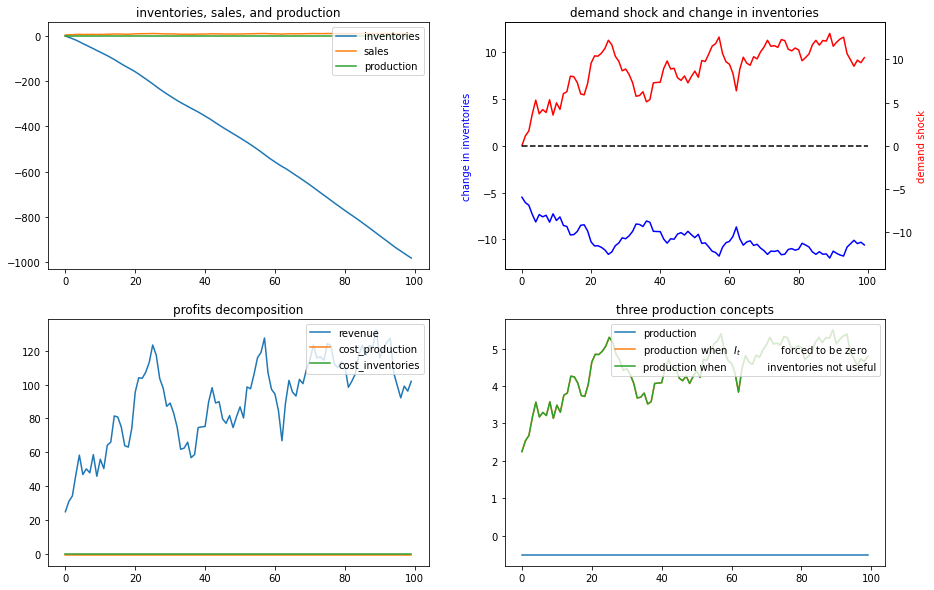

In [8]:
ex4 = SmoothingExample(d1=0, d2=0)

x0 = [0, 1, 0]
ex4.simulate(x0)

Let’s shorten the time span displayed in order to highlight what is
going on.

We’ll set the horizon $T =30$ with the following code

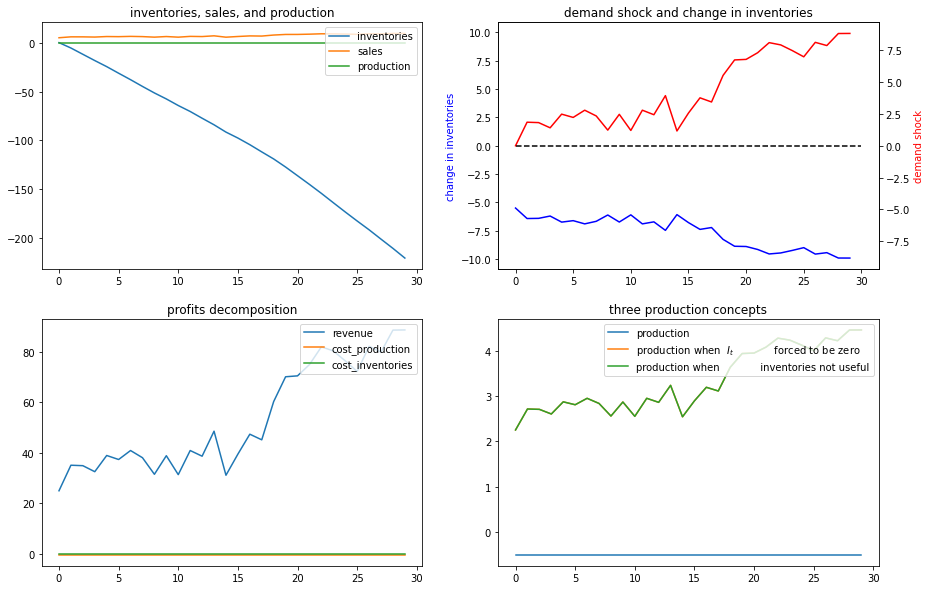

In [9]:
# shorter period
ex4.simulate(x0, T=30)

## Example 5

Now we’ll assume that the demand shock that follows a linear time trend

$$
v_t = b + a t  , a> 0, b> 0
$$

To represent this, we set
$C_2 = \begin{bmatrix} 0 \cr 0 \end{bmatrix}$ and

$$
A_{22}=\left[\begin{array}{cc}
1 & 0\\
1 & 1
\end{array}\right],x_{0}=\left[\begin{array}{c}
1\\
0
\end{array}\right],
G=\left[\begin{array}{cc}
b & a\end{array}\right]
$$

In [10]:
# Set parameters
a = 0.5
b = 3.

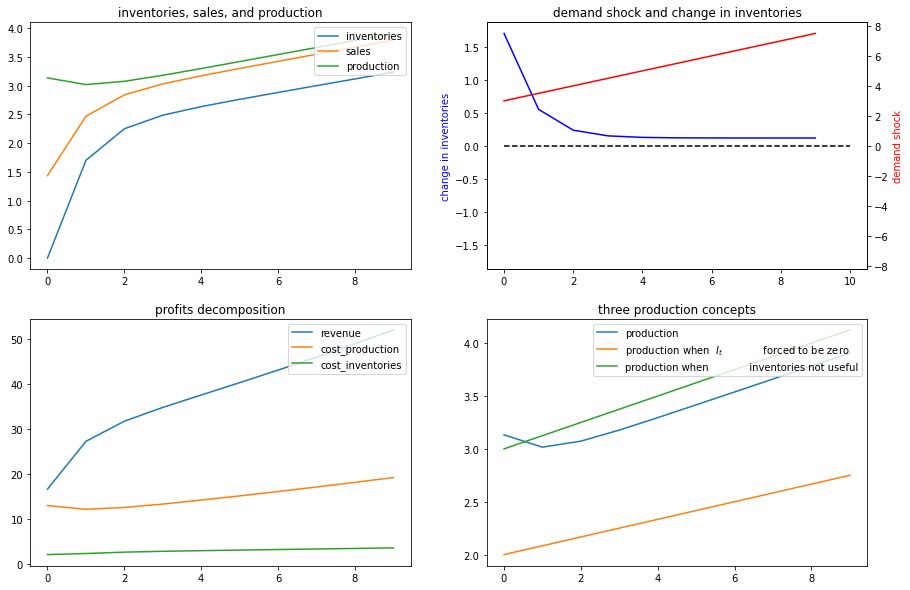

In [11]:
ex5 = SmoothingExample(A22=[[1, 0], [1, 1]], C2=[[0], [0]], G=[b, a])

x0 = [0, 1, 0] # set the initial inventory as 0
ex5.simulate(x0, T=10)

## Example 6

Now we’ll assume a deterministically seasonal demand shock.

To represent this we’ll set

$$
A_{22} = \begin{bmatrix}  1 & 0 & 0 & 0 & 0  \cr 0 & 0 & 0 & 0  & 1 \cr
    0 & 1 & 0 & 0 & 0 \cr
    0 & 0 & 1 & 0 & 0 \cr
    0 & 0 & 0 & 1 & 0 \end{bmatrix},
  C_2 = \begin{bmatrix} 0 \cr 0 \cr 0 \cr 0 \cr 0 \end{bmatrix},  G' = \begin{bmatrix} b \cr a \cr 0 \cr 0 \cr 0
  \end{bmatrix}
$$

where $a > 0, b>0$ and

$$
x_0 = \begin{bmatrix} 1 \cr 0 \cr 1 \cr 0 \cr 0 \end{bmatrix}
$$

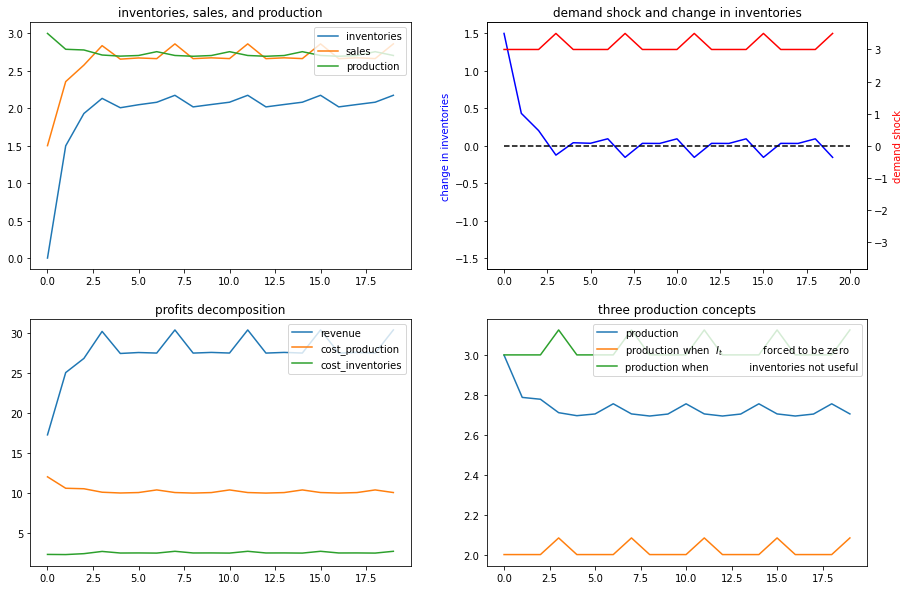

In [12]:
ex6 = SmoothingExample(A22=[[1, 0, 0, 0, 0],
                            [0, 0, 0, 0, 1],
                            [0, 1, 0, 0, 0],
                            [0, 0, 1, 0, 0],
                            [0, 0, 0, 1, 0]],
                       C2=[[0], [0], [0], [0], [0]],
                       G=[b, a, 0, 0, 0])

x00 = [0, 1, 0, 1, 0, 0] # Set the initial inventory as 0
ex6.simulate(x00, T=20)

Now we’ll generate some more examples that differ simply from the
initial **season** of the year in which we begin the demand shock

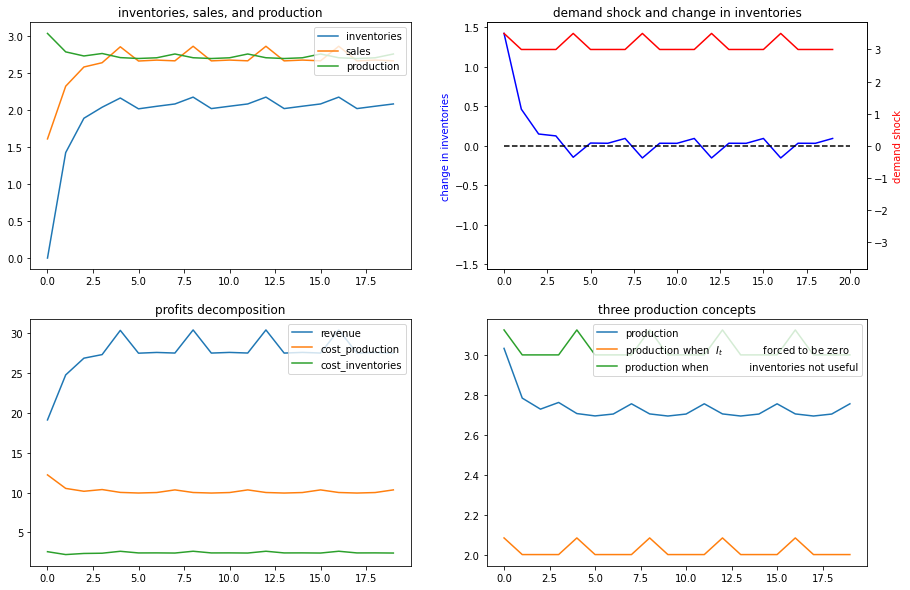

In [13]:
x01 = [0, 1, 1, 0, 0, 0]
ex6.simulate(x01, T=20)

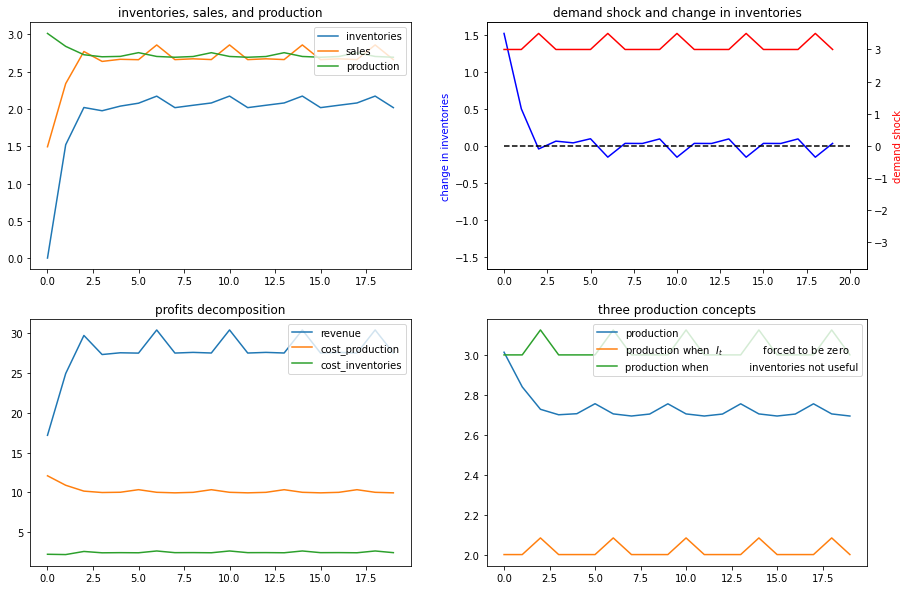

In [14]:
x02 = [0, 1, 0, 0, 1, 0]
ex6.simulate(x02, T=20)

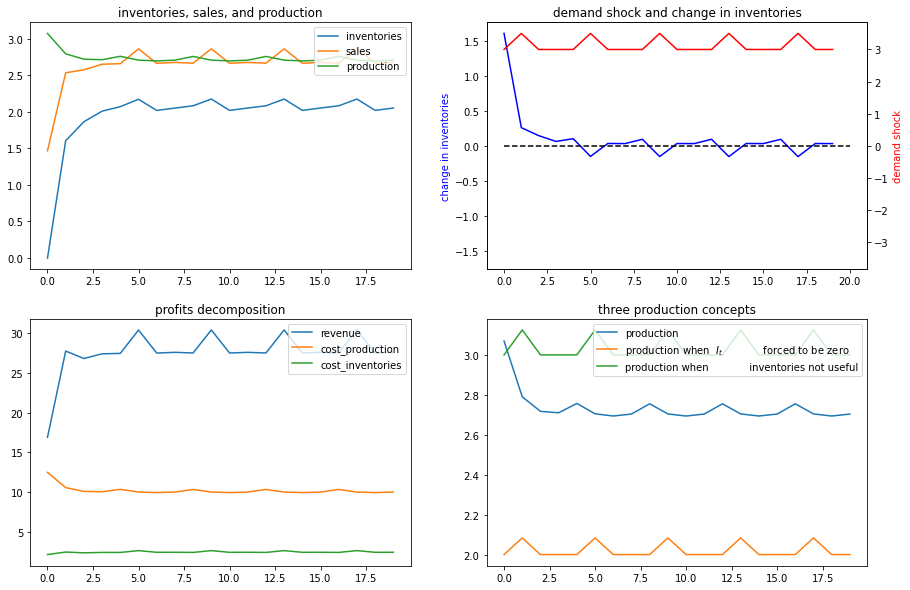

In [15]:
x03 = [0, 1, 0, 0, 0, 1]
ex6.simulate(x03, T=20)

## Exercises

Please try to analyze some inventory sales smoothing problems using the
`SmoothingExample` class.

```{exercise}
:label: lqi_ex1

Assume that the demand shock follows AR(2) process below:

$$
\nu_{t}=\alpha+\rho_{1}\nu_{t-1}+\rho_{2}\nu_{t-2}+\epsilon_{t}.
$$

where $\alpha=1$, $\rho_{1}=1.2$, and $\rho_{2}=-0.3$.
You need to construct $A22$, $C$, and $G$ matrices
properly and then to input them as the keyword arguments of
`SmoothingExample` class. Simulate paths starting from the initial
condition $x_0 = \left[0, 1, 0, 0\right]^\prime$.

After this, try to construct a very similar `SmoothingExample` with
the same demand shock process but exclude the randomness
$\epsilon_t$. Compute the stationary states $\bar{x}$ by
simulating for a long period. Then try to add shocks with different
magnitude to $\bar{\nu}_t$ and simulate paths. You should see how
firms respond differently by staring at the production plans.
```


```{exercise}
:label: lqi_ex2

Change parameters of $C(Q_t)$ and $d(I_t, S_t)$.

1. Make production more costly, by setting $c_2=5$.
1. Increase the cost of having inventories deviate from sales, by
   setting $d_2=5$.
```


## Solutions

```{solution-start} lqi_ex1
:class: dropdown
```

In [16]:
# set parameters
α = 1
ρ1 = 1.2
ρ2 = -.3

In [17]:
# construct matrices
A22 =[[1,  0,  0],
          [1, ρ1, ρ2],
          [0,  1, 0]]
C2 = [[0], [1], [0]]
G = [0, 1, 0]

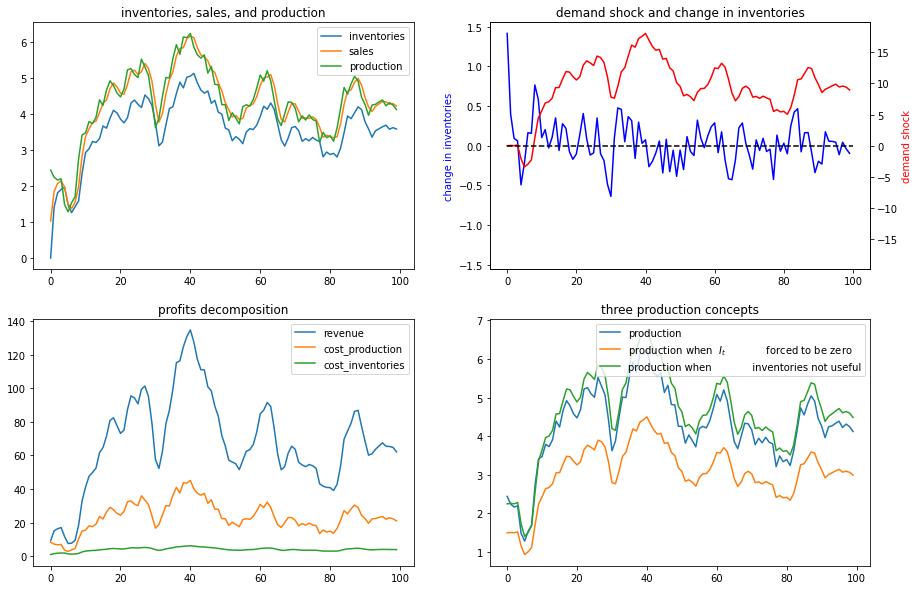

In [18]:
ex1 = SmoothingExample(A22=A22, C2=C2, G=G)

x0 = [0, 1, 0, 0] # initial condition
ex1.simulate(x0)

In [19]:
# now silence the noise
ex1_no_noise = SmoothingExample(A22=A22, C2=[[0], [0], [0]], G=G)

# initial condition
x0 = [0, 1, 0, 0]

# compute stationary states
x_bar = ex1_no_noise.LQ.compute_sequence(x0, ts_length=250)[0][:, -1]
x_bar

array([ 3.69387755,  1.        , 10.        , 10.        ])

In the following, we add small and large shocks to $\bar{\nu}_t$
and compare how firm responds differently in quantity. As the shock is
not very persistent under the parameterization we are using, we focus on
a short period response.

In [20]:
T = 40

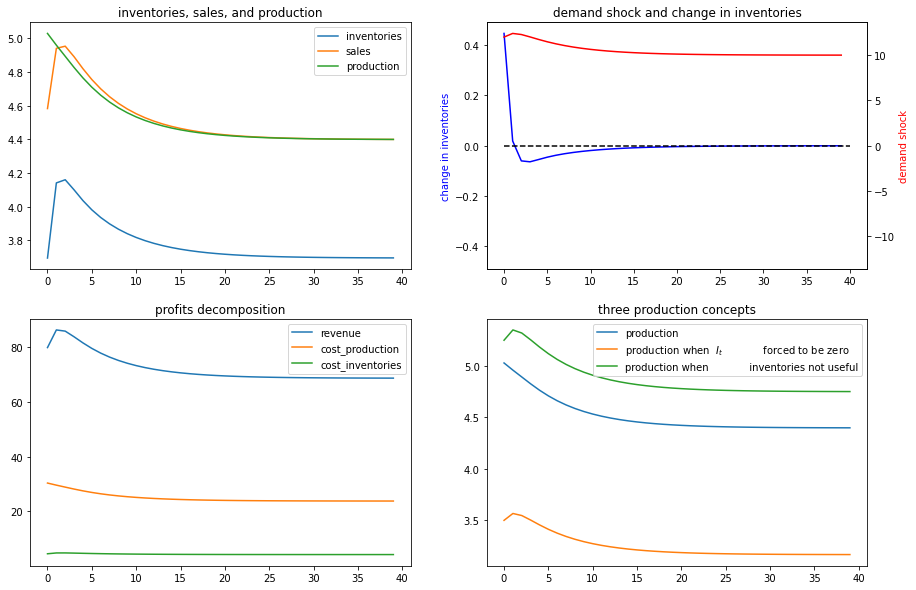

In [21]:
# small shock
x_bar1 = x_bar.copy()
x_bar1[2] += 2
ex1_no_noise.simulate(x_bar1, T=T)

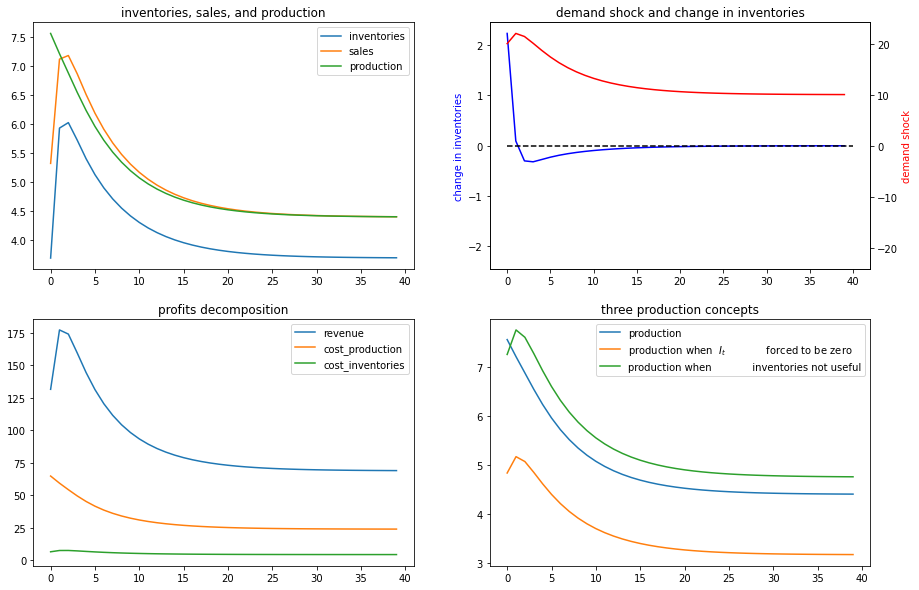

In [22]:
# large shock
x_bar1 = x_bar.copy()
x_bar1[2] += 10
ex1_no_noise.simulate(x_bar1, T=T)

```{solution-end}
```


```{solution-start} lqi_ex2
:class: dropdown
```

In [23]:
x0 = [0, 1, 0]

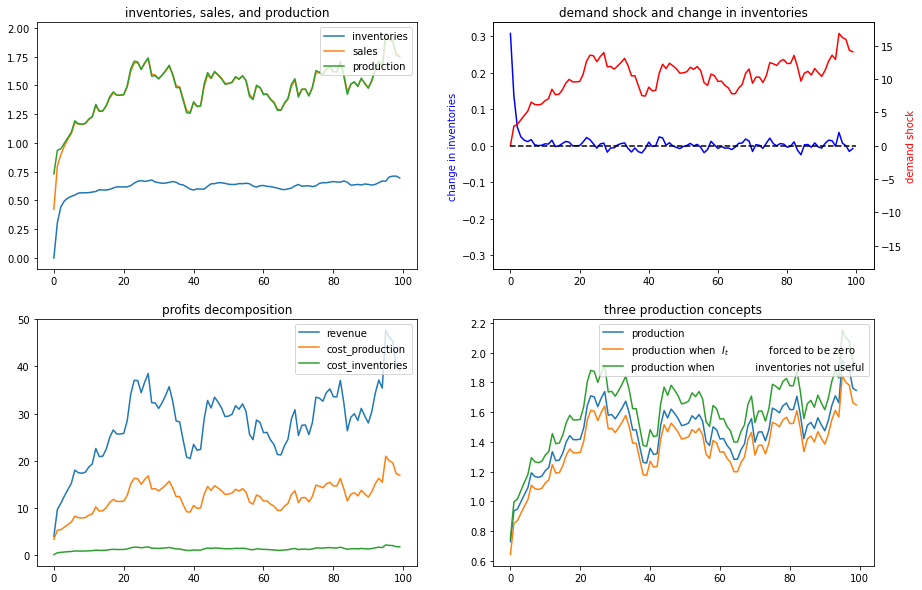

In [24]:
SmoothingExample(c2=5).simulate(x0)

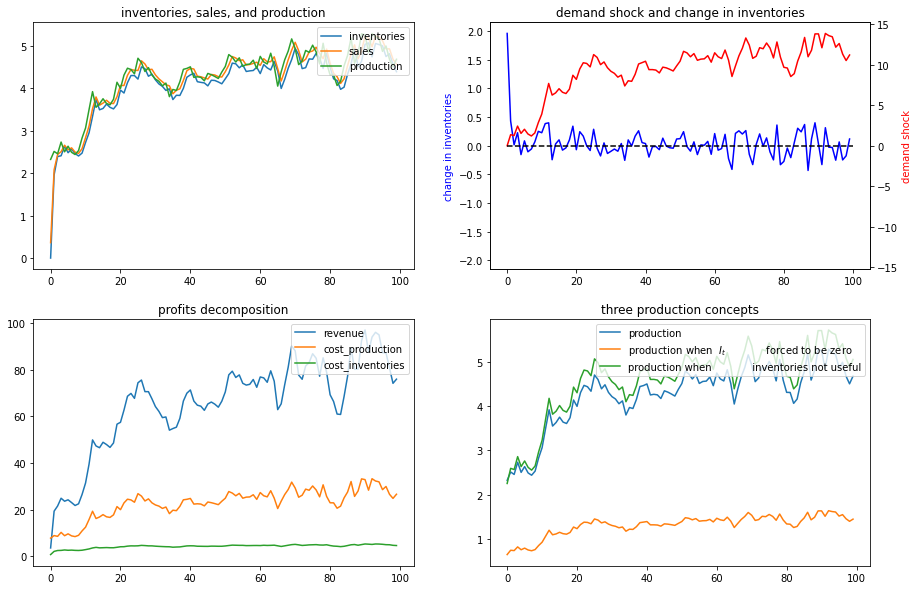

In [25]:
SmoothingExample(d2=5).simulate(x0)

```{solution-end}
```